## 1. Import Modules, Load Data and Data Review

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(precision=None, suppress=True)

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !pip install -q kaggle
# files.upload()
# ! mkdir ~/.kaggle
# ! cp /content/kaggle/kaggle.json ~/.kaggle/
#! kaggle datasets list
#  ! kaggle competitions download -c dogus-teknoloji-zingat
# ! mkdir train
# ! unzip /content/zingat_usecase_trainset.csv.zip -d train
# ! unzip /content/zingat_usecase_testset_null.csv.zip -d train

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DATA/train/zingat_usecase_trainset.csv")

In [ ]:
df.head()

In [ ]:
df = df.convert_dtypes()

In [ ]:
df.info()

In [ ]:
df.shape

(64573, 21)

In [ ]:
df.isna().sum().all()

False

In [ ]:
df.duplicated().any()

False

In [ ]:
# dolar_kuru = pd.read_csv('/content/gdrive/MyDrive/DATA/train/Dolar_Kuru.csv')

In [ ]:
# df = df.join(dolar_kuru.set_index('Tarih'), on='tarih')
# df

## Feature Engineering

#### Ilan_ID

In [ ]:
df.Ilan_ID.nunique()

64573

In [ ]:
df.drop("Ilan_ID", axis=1, inplace=True)

Ilan_ID her satırda farklı bir değer olduğu için düşürüldü

In [ ]:
df.rename(columns={"path": "adres",             # Sütun isimleri kullanım kolaylığı açısından değiştirildi
                   "güncel_fiyat": "fiyat",
                   "odasayısı": "oda_sayısı",
                   "brütm²": "brüt_m2",
                   "netm²": "net_m2",
                   "emlaktipi": "emlak_tipi",
                   "binayaşı": "bina_yaşı",
                   "bulunduğukat": "bulunduğu_kat",
                   "binadakikatsayısı": "kat_sayısı",
                   "isıtmatipi": "ısıtma_tipi",
                   "banyosayisi": "banyo_sayısı",
                   "İnterkom": "interkom",
                   "depremyönetmeliğineuygun": "deprem_yönetmeliğine_uygun",
                   "Çocukoyunalanı": "çocuk_oyun_alanı",
                   "giyinmeodası": "giyinme_odası",
                   "ebeveynbanyosu": "ebeveyn_banyosu"}, inplace=True)

#### tarih

In [ ]:
df['tarih'] = pd.to_datetime(df['tarih']) # Tarih sütunu yıl ve ay olmak üzere iki farklı sütuna ayrıldı
df['yıl'] = df['tarih'].apply(lambda date : date.year)
df['ay'] = df['tarih'].apply(lambda date : date.month)
df = df.drop('tarih', axis=1)
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380,370,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,2019,1
1,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65,55,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205,197,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150,130,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70,65,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,2019,1


#### fiyat

In [ ]:
df['fiyat'] = df['fiyat'].str.replace(' TRY', '').astype("int64") # Fiyat sütunu integer olarak değiştirild.

In [ ]:
df.info()

#### interkom, deprem_yönetmeliğine_uygun, asansör, çocuk_oyun_alanı, giyinme_odası, ebeveyn_banyosu

In [ ]:
ls = ["interkom", "deprem_yönetmeliğine_uygun", "asansör", # VAR ve YOK olarak belirtilen altı özellik 1 ve 0 olarak değiştirildi
      "çocuk_oyun_alanı", "giyinme_odası", "ebeveyn_banyosu"]
for i in ls:
    df[i] = df[i].map({'VAR': 1, 'YOK': 0})

In [ ]:
df.head()

#### adres
Mahalleye kadar detaylı olan adres satırı sadece ilçe/mahalle kalacak şekilde sadeleştirildi

In [ ]:
# df.adres = df.adres.str.split('/', expand=True)[0].astype(
#     str) + "/" + df.adres.str.split('/', expand=True)[1].astype(str)

In [ ]:
# df = df.groupby('adres').filter(lambda x : len(x)>=20)

#### oda_sayısı
oda_sayısı sütunu toplandı.

In [ ]:
df['oda_sayısı'] = df['oda_sayısı'].replace("-","0+0")

In [ ]:
df["oda_sayısı"] = df.oda_sayısı.str.split('+', expand=True)[0].astype("int64") + df.oda_sayısı.str.split('+', expand=True)[1].astype("int64") 

In [ ]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000,7,380,370,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",1,1,1,1,1,1,2019,1
1,İstanbul/Kadıköy/Erenköy,547500,3,65,55,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,1,0,1,0,0,0,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000,4,205,197,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",1,1,1,0,0,1,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000,4,150,130,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",0,0,1,0,0,1,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000,3,70,65,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,1,0,1,0,1,1,2019,1


In [ ]:
df[df['oda_sayısı'] == 1149]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
2076,İzmir/Konak/Çankaya,985000,1149,167,115,Daire,36-40 arası,8,8,Klima,0,_,-,0,0,0,0,0,0,2019,1
2079,İzmir/Karabağlar/General Kazım Özalp,330000,1149,85,70,Daire,0,1,10-20 arası,Kombi (Doğalgaz),1,_,"Var (Ücretsiz, Açık)",0,0,0,0,0,0,2019,1
2587,İzmir/Karabağlar/Vatan,190000,1149,90,80,Daire,4,Yüksek Giriş,4,Kombi (Doğalgaz),1,_,-,0,0,0,0,0,0,2019,1
7127,İzmir/Karabağlar/Bahçelievler,345000,1149,85,80,Daire,31-35 arası,1,3,Kombi (Doğalgaz),1,_,-,0,0,0,0,0,0,2019,2
11197,İstanbul/Pendik/Çınardere,315000,1149,90,75,Daire,4,3,4,Kombi (Doğalgaz),2,_,-,0,0,0,0,0,0,2019,3
12822,İstanbul/Kadıköy/Suadiye,925000,1149,115,90,Daire,0,13,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),1,"Doğa,Şehir","Var (Ücretsiz, Açık)",0,0,0,0,0,1,2019,4
24017,İzmir/Bornova/Yeşilova,850000,1149,180,125,Rezidans,0,5,9,Merkezi Sistem (Isı Payı Ölçer),1,_,"Var (Ücretsiz, Açık)",1,1,0,0,0,0,2019,7
25776,İzmir/Çiğli/Evka-2,207000,1149,80,70,Daire,26-30 arası,5,5,Yok,1,_,-,0,0,0,0,0,0,2019,7
30765,İzmir/Çeşme/Altınyunus,990000,1149,95,80,Daire,21-25 arası,1,3,Klima,1,_,"Var (Ücretsiz, Açık)",0,0,0,0,0,0,2019,9
36728,İstanbul/Beşiktaş/Levent,1350000,1149,120,110,Daire,26-30 arası,Giriş Katı,10-20 arası,Merkezi Sistem,2,_,-,0,0,0,0,0,1,2019,10


In [ ]:
df['oda_sayısı'] = df['oda_sayısı'].where(df['oda_sayısı'] != 1149, 0)

#### otopark
otopark sütununda var içerenler 1 diğerleri 0 olarak düzeltildi

In [ ]:
df.otopark = df.otopark.str.contains("Var").astype("int32")

In [ ]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,ay
0,İstanbul/Beylikdüzü,1050000,7,380,370,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl",1,1,1,1,1,1,1,1
1,İstanbul/Kadıköy,547500,3,65,55,Daire,0,1,7,Kombi (Doğalgaz),1,_,0,1,0,1,0,0,0,1
2,İstanbul/Beylikdüzü,440000,4,205,197,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir",1,1,1,1,0,0,1,1
3,İstanbul/Beşiktaş,1450000,4,150,130,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir",1,0,0,1,0,0,1,1
4,İstanbul/Beylikdüzü,169000,3,70,65,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",1,1,0,1,0,1,1,1


#### manzara
manzaralar ayrı sütunlara ayrıldı manzara değeri olmayanlar bilinmiyor olarak değiştirildi

In [ ]:
df.manzara.value_counts()

_                                                                        41713
Şehir                                                                     7631
Doğa,Şehir                                                                2092
Cadde,Şehir                                                               1018
Boğaz,Cadde,Deniz,Havuz,Park,Şehir,Yeşil Alan,Göl,Nehir,Vadi,Dağ,Doğa      960
                                                                         ...  
Boğaz,Cadde,Deniz,Havuz,Park,Şehir,Yeşil Alan,Nehir,Doğa                     1
Boğaz,Park,Şehir,Yeşil Alan,Göl,Nehir,Vadi                                   1
Göl,Deniz,Şehir                                                              1
Boğaz,Cadde,Dağ,Doğa,Göl,Vadi,Yeşil Alan                                     1
Cadde,Havuz,Park,Şehir,Göl,Dağ,Doğa                                          1
Name: manzara, Length: 917, dtype: Int64

In [ ]:
df["manzara_boğaz"] = 0
df["manzara_cadde"] = 0
df["manzara_dağ"] = 0
df["manzara_deniz"] = 0
df["manzara_doğa"] = 0
df["manzara_göl"] = 0
df["manzara_havuz"] = 0
df["manzara_nehir"] = 0
df["manzara_park"] = 0
df["manzara_şehir"] = 0
df["manzara_vadi"] = 0
df["manzara_yeşilalan"] = 0
df["manzara_bilinmiyor"] = 0

In [ ]:
for ind, item in zip(df.manzara.index, df.manzara):
    if "Boğaz" in item:
        df.at[ind,'manzara_boğaz'] = 1
    if "Cadde" in item:
        df.at[ind,'manzara_cadde'] = 1
    if "Dağ" in item:
        df.at[ind,'manzara_dağ'] = 1
    if "Deniz" in item:
        df.at[ind,'manzara_deniz'] = 1
    if "Doğa" in item:
        df.at[ind,'manzara_doğa'] = 1
    if "Göl" in item:
        df.at[ind,'manzara_göl'] = 1
    if "Havuz" in item:
        df.at[ind,'manzara_havuz'] = 1
    if "Nehir" in item:
        df.at[ind,'manzara_nehir'] = 1
    if "Park" in item:
        df.at[ind,'manzara_park'] = 1
    if "Şehir" in item:
        df.at[ind,'manzara_şehir'] = 1
    if "Vadi" in item:
        df.at[ind,'manzara_vadi'] = 1
    if "Yeşil Alan" in item:
        df.at[ind,'manzara_yeşilalan'] = 1
    if "_" in item:
        df.at[ind,'manzara_bilinmiyor'] = 1

In [ ]:
df.head()

In [ ]:
df.drop("manzara", axis=1, inplace=True)

### Data Cleaning

> **Adres**

In [ ]:
df = df.groupby('adres').filter(lambda x : len(x)>=20)

In [ ]:
df.shape

(64562, 32)

Adres olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

>#### oda_sayısı

In [ ]:
df.oda_sayısı.value_counts()

4     25261
3     23733
5      5735
2      5041
6      2617
7      1107
8       413
1       282
9       155
10      114
0        51
11       28
12       20
14        8
13        5
23        2
25        1
Name: oda_sayısı, dtype: int64

In [ ]:
df = df.groupby('oda_sayısı').filter(lambda x : len(x)>20)

In [ ]:
df.oda_sayısı.value_counts()

4     25261
3     23733
5      5735
2      5041
6      2617
7      1107
8       413
1       282
9       155
10      114
0        51
11       28
Name: oda_sayısı, dtype: int64

oda sayısı olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

#### brüt_m2

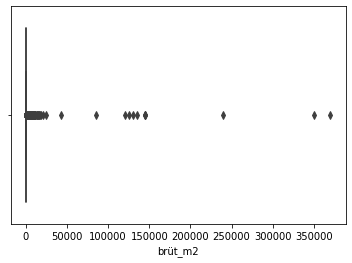

In [ ]:
sns.boxplot(df.brüt_m2);

In [ ]:
df[df.brüt_m2 < df.net_m2]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
1250,İzmir/Kemalpaşa/Cumhuriyet,1650000,10,1,600,Köşk / Konak / Yalı,0,-,3,Klima,3,0,0,0,0,0,0,1,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5294,İstanbul/Beşiktaş/Bebek,45000000,9,1,950,Villa,21-25 arası,Müstakil,4,Klima,4,1,1,0,1,0,1,1,2019,2,1,0,0,1,1,0,0,0,0,0,0,0,0
6491,İzmir/Çeşme/Dalyan,1250000,4,120,300,Villa,6-10 arası,-,2,-,2,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
8902,İstanbul/Beşiktaş/Ulus,27000000,6,1,309,Villa,16-20 arası,Müstakil,3,Kombi (Doğalgaz),3,1,0,0,0,0,0,0,2019,3,0,0,0,0,1,0,0,0,0,0,0,0,0
13020,İzmir/Çeşme/Ardıç,17000000,6,1,300,Villa,6-10 arası,Müstakil,2,Kat Kaloriferi,5,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
13029,İzmir/Çeşme/Ilıca,3900000,7,1,350,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
13033,İzmir/Çeşme/Musalla,12900000,9,5,550,Köşk / Konak / Yalı,0,-,2,Yerden Isıtma,6 ve üzeri,0,0,0,0,0,0,1,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
14828,İzmir/Karabağlar/Refet Bele,235000,3,98,100,Daire,5,3,3,Kombi (Doğalgaz),1,0,1,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
16647,İzmir/Çeşme/Ilıca,3900000,7,1,350,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1
34195,İzmir/Seferihisar/Cumhuriyet,250000,3,70,90,Yazlık,11-15 arası,Bahçe katı,3,Klima,1,0,0,0,0,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
for i in range(df.shape[0]):
    if df.brüt_m2.iloc[i] < df.net_m2.iloc[i]:
        df.brüt_m2.iloc[i] = df.net_m2.iloc[i]

Brüt metrekare net metkrekareden küçük olamayacağı için bu durumda olan satırlarda ikisi eşitlendi

***Veri emlak tipine göre bölünecek***

In [ ]:
df['emlak_tipi'].unique()

<StringArray>
[              'Daire',         'Müstakil Ev',               'Villa',
              'Yazlık',            'Rezidans',         'Çiftlik Evi',
 'Köşk / Konak / Yalı',        'Yalı Dairesi',        'Prefabrik Ev']
Length: 9, dtype: string

In [ ]:
df.shape

(64537, 33)

In [ ]:
df_daire = df[df['emlak_tipi']=='Daire']
df_köşk_konak_yalı = df[df['emlak_tipi']=='Köşk / Konak / Yalı']
df_müstakil = df[df['emlak_tipi']=='Müstakil Ev']
df_prefabrik = df[df['emlak_tipi']=='Prefabrik Ev']
df_rezidans = df[df['emlak_tipi']=='Rezidans']
df_villa = df[df['emlak_tipi']=='Villa']
df_yalı_dairesi = df[df['emlak_tipi']=='Yalı Dairesi']
df_yazlık = df[df['emlak_tipi']=='Yazlık']
df_çiftlik = df[df['emlak_tipi']=='Çiftlik Evi']

In [ ]:
list_df = [df_daire, df_köşk_konak_yalı, df_müstakil, df_prefabrik, df_rezidans, df_villa, df_yalı_dairesi, df_yazlık, df_çiftlik] 

In [ ]:
df_daire.name = 'Daire'
df_köşk_konak_yalı.name = 'Köşk/Konak/Yalı'
df_müstakil.name = 'Müstakil'
df_prefabrik.name = 'Prefabrik'
df_rezidans.name = 'Rezidans'
df_villa.name = 'Villa'
df_yalı_dairesi.name = 'Yalı Dairesi'
df_yazlık.name = 'Yazlık'
df_çiftlik.name = 'Çiftlik Evi'

In [ ]:
sum = 0
for i in list_df:
  sum += i.shape[0]
print(sum)


64537


In [ ]:
df.columns

Index(['adres', 'fiyat', 'oda_sayısı', 'brüt_m2', 'net_m2', 'emlak_tipi',
       'bina_yaşı', 'bulunduğu_kat', 'kat_sayısı', 'ısıtma_tipi',
       'banyo_sayısı', 'otopark', 'interkom', 'deprem_yönetmeliğine_uygun',
       'asansör', 'çocuk_oyun_alanı', 'giyinme_odası', 'ebeveyn_banyosu',
       'Ilan_ID', 'yıl', 'ay', 'manzara_boğaz', 'manzara_cadde', 'manzara_dağ',
       'manzara_deniz', 'manzara_doğa', 'manzara_göl', 'manzara_havuz',
       'manzara_nehir', 'manzara_park', 'manzara_şehir', 'manzara_vadi',
       'manzara_yeşilalan', 'manzara_bilinmiyor'],
      dtype='object')

In [ ]:
df.dtypes

adres                         string
fiyat                          int64
oda_sayısı                     int64
brüt_m2                        Int64
net_m2                         Int64
emlak_tipi                    string
bina_yaşı                     string
bulunduğu_kat                 string
kat_sayısı                    string
ısıtma_tipi                   string
banyo_sayısı                  string
otopark                        int32
interkom                       int64
deprem_yönetmeliğine_uygun     int64
asansör                        int64
çocuk_oyun_alanı               int64
giyinme_odası                  int64
ebeveyn_banyosu                int64
Ilan_ID                        Int64
yıl                            int64
ay                             int64
manzara_boğaz                  int64
manzara_cadde                  int64
manzara_dağ                    int64
manzara_deniz                  int64
manzara_doğa                   int64
manzara_göl                    int64
m

In [ ]:
noissy_columns = ['brüt_m2', 'net_m2', 'fiyat']

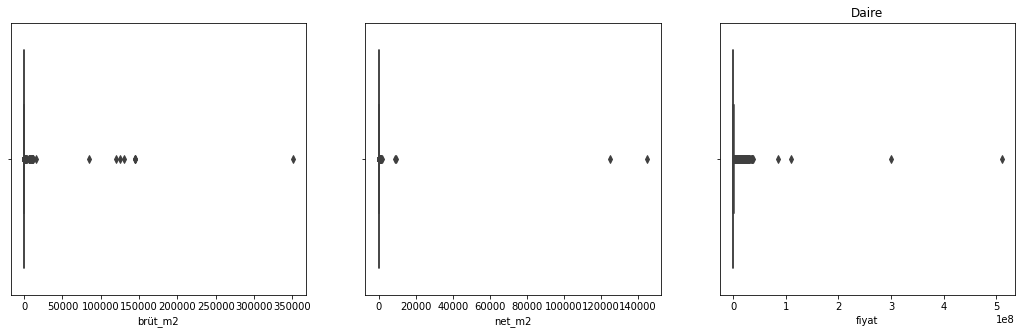

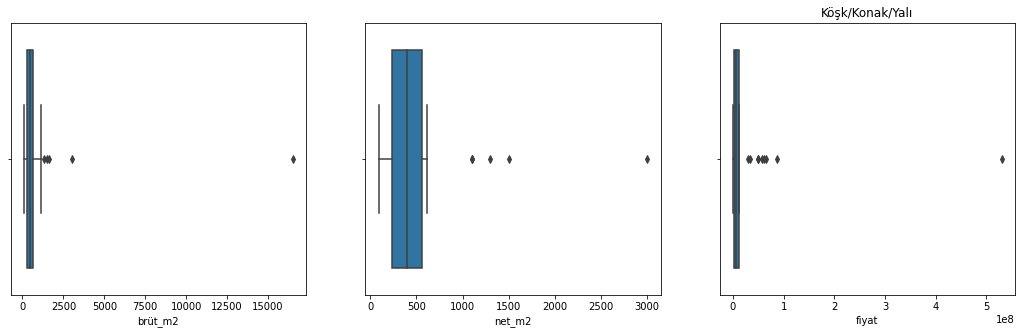

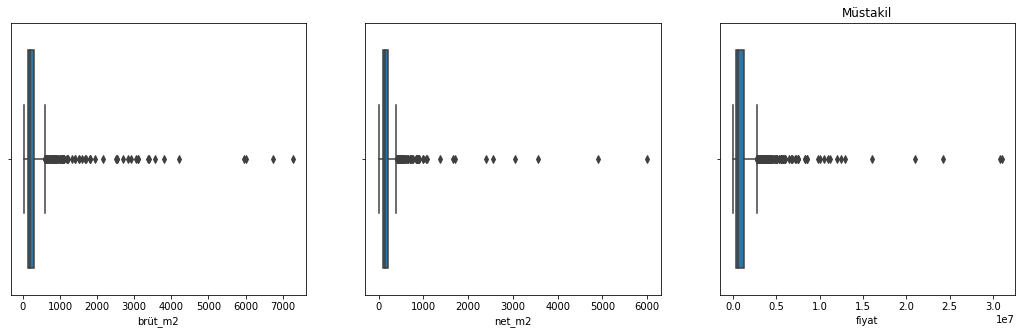

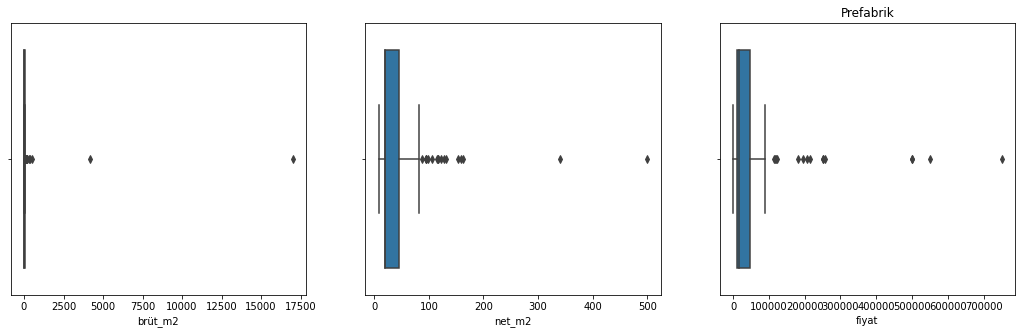

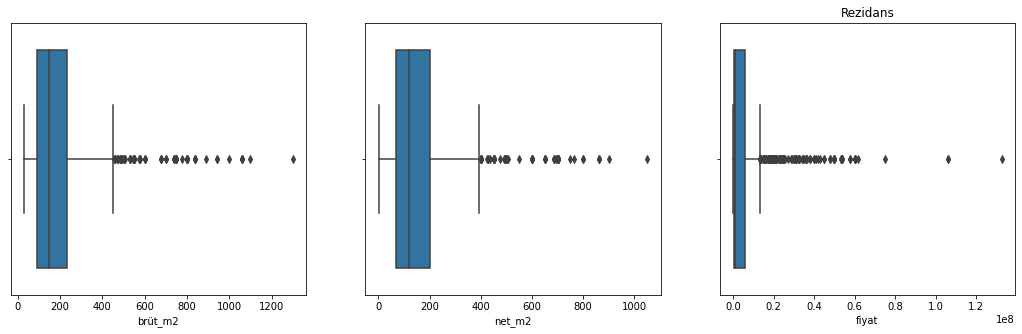

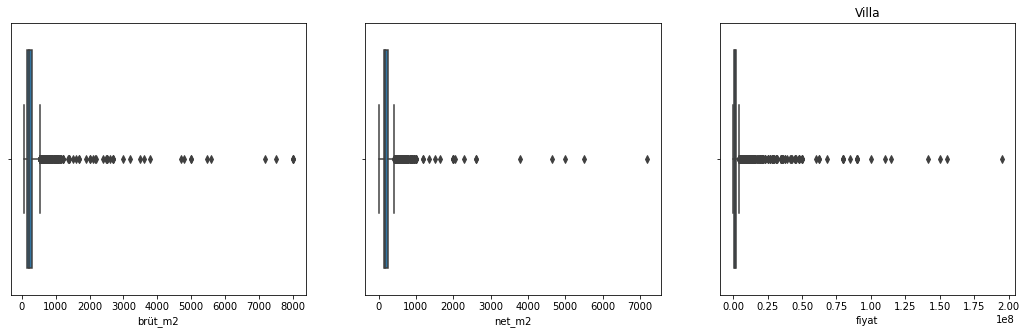

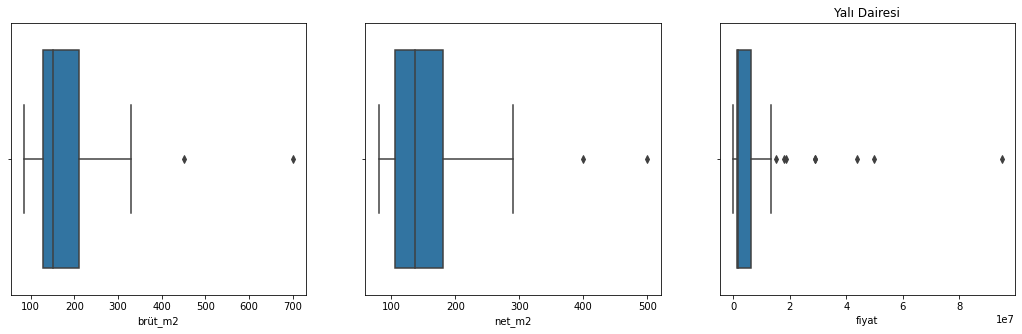

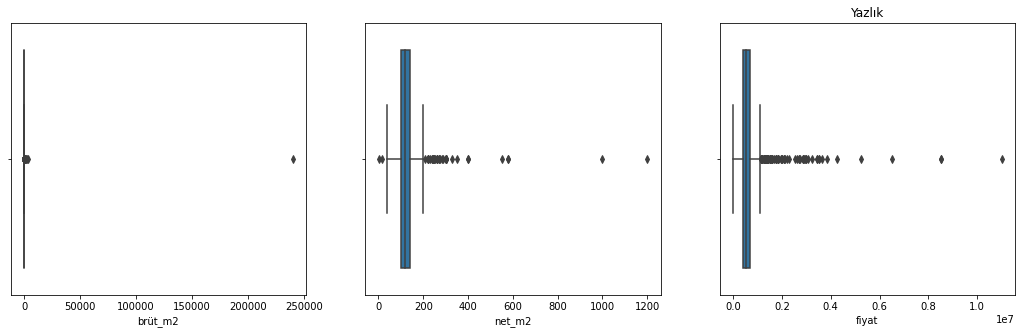

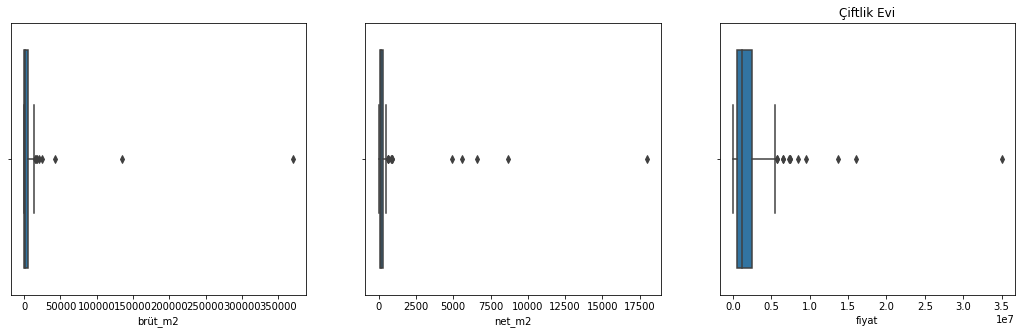

In [ ]:
for dframe in list_df:
  fig, ax =plt.subplots(1,3,figsize=(18,5))
  plt.title(dframe.name)
  for ind, col in enumerate(noissy_columns):
    sns.boxplot(data = dframe, x = col, ax =ax[ind])
  
plt.show()

In [ ]:
# from scipy.stats.mstats import winsorize

In [ ]:
# for dframe in list_df:
#   for ind, col in enumerate(noissy_columns):
#     print('{}:{}, {} columns quantiles;'.format(ind, dframe.name, col) )
#     for i in range(1,6):
#       print('Q {} : {}, Quantile {} : {}'.format((i * 0.05), dframe[col].quantile((i * 0.05)), (1- (i * 0.05)), dframe[col].quantile(1 - (i * 0.05))),)
#     print()


In [ ]:
def upper_lower_lim(column):
  """Claculates upper and lower limits for 1.5 IQR """
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_lim = Q1 - 1.5 * IQR
  upper_lim = Q3 + 1.5 * IQR
  return lower_lim, upper_lim

def soften_outliers(column):
  '''It pulls data other than 1.5 IQR to 1.5 iqr.'''
  low, up = upper_lower_lim(column)
  def check_location(num, low, up):
    if num < low:
      return low
    elif num > up:
      return up
    else:
      return num
  return column.apply(check_location, low=low, up=up)

In [ ]:
for df_ in list_df:
  for col in noissy_columns:
    df_[col] = soften_outliers(df_[col])


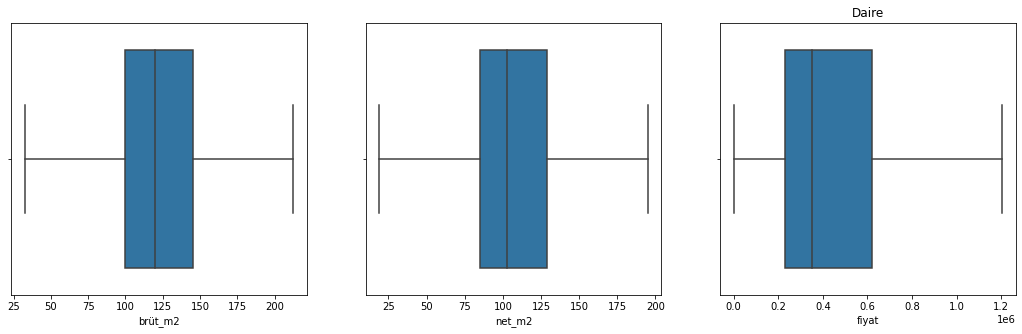

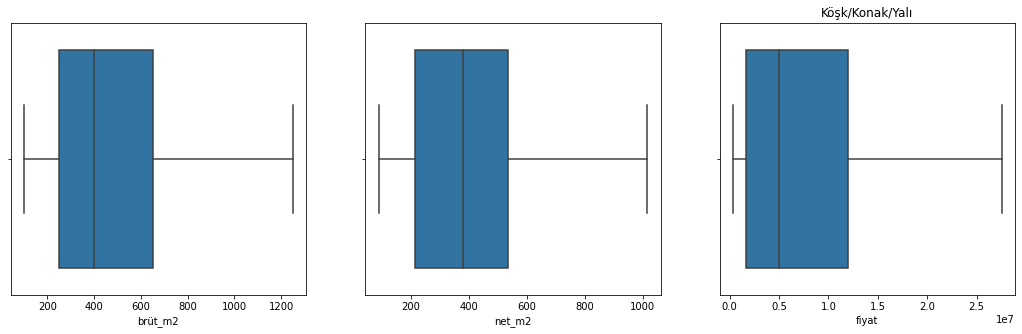

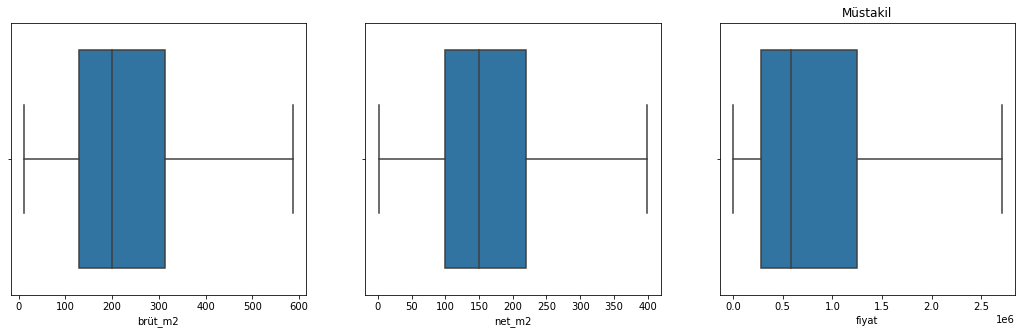

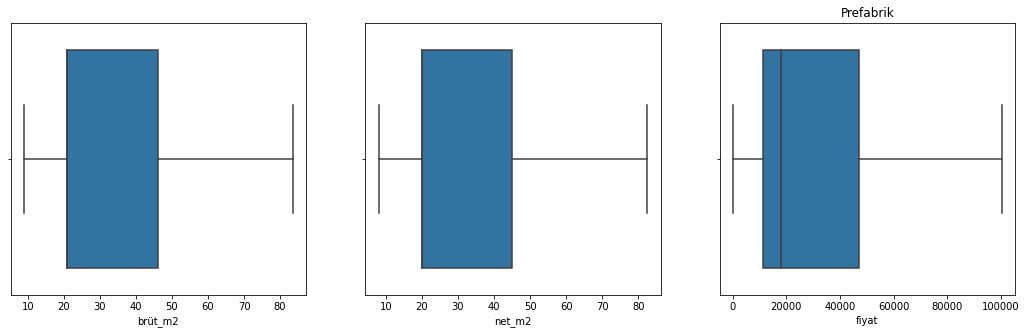

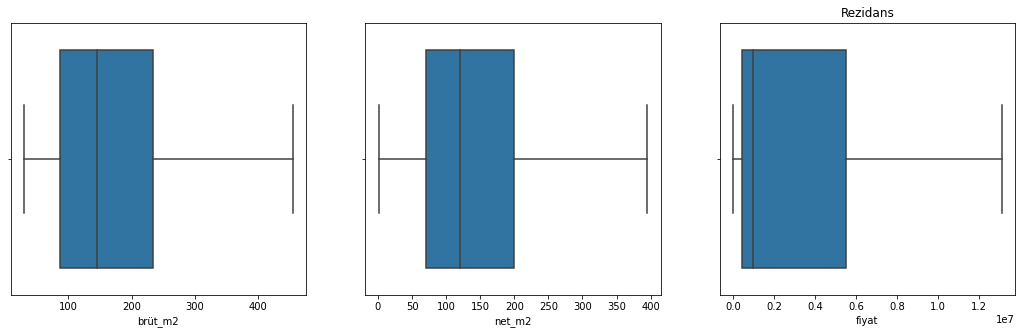

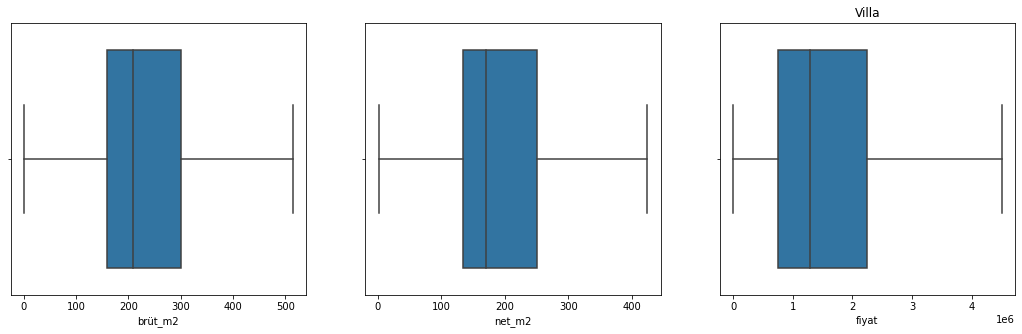

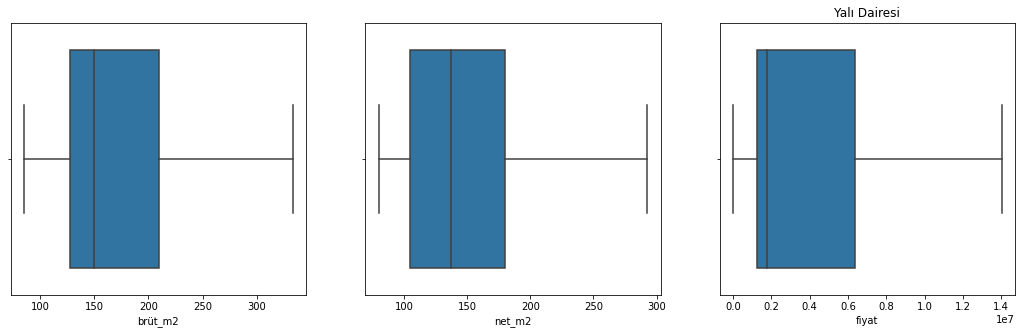

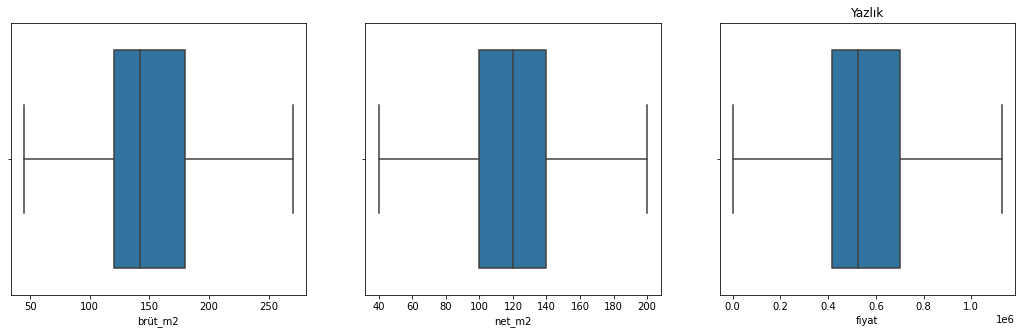

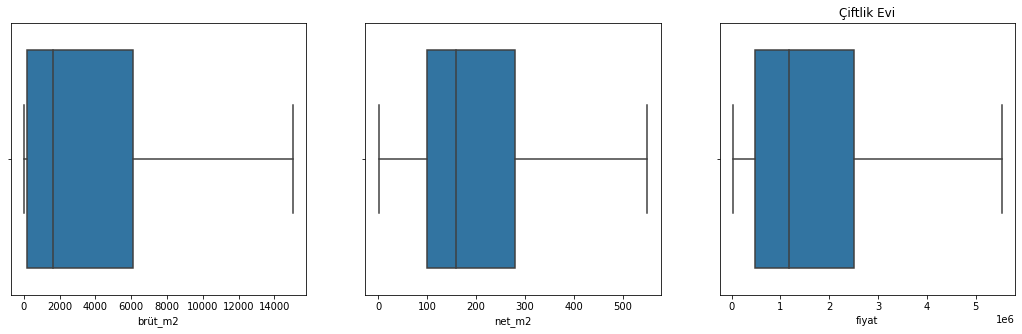

In [ ]:
for dframe in list_df:
  fig, ax =plt.subplots(1,3,figsize=(18,5))
  plt.title(dframe.name)
  for ind, col in enumerate(noissy_columns):
    sns.boxplot(data = dframe, x = col, ax =ax[ind])
  
plt.show()

In [ ]:
df = pd.concat(list_df)

In [ ]:
type(list_df)

list

In [ ]:
len(df)

64537

In [ ]:
df.columns

Index(['adres', 'fiyat', 'oda_sayısı', 'brüt_m2', 'net_m2', 'emlak_tipi',
       'bina_yaşı', 'bulunduğu_kat', 'kat_sayısı', 'ısıtma_tipi',
       'banyo_sayısı', 'otopark', 'interkom', 'deprem_yönetmeliğine_uygun',
       'asansör', 'çocuk_oyun_alanı', 'giyinme_odası', 'ebeveyn_banyosu',
       'yıl', 'ay', 'manzara_boğaz', 'manzara_cadde', 'manzara_dağ',
       'manzara_deniz', 'manzara_doğa', 'manzara_göl', 'manzara_havuz',
       'manzara_nehir', 'manzara_park', 'manzara_şehir', 'manzara_vadi',
       'manzara_yeşilalan', 'manzara_bilinmiyor'],
      dtype='object')

In [ ]:
df.adres.value_counts()

İstanbul/Beylikdüzü/Cumhuriyet           5715
İstanbul/Beylikdüzü/Yakuplu              2220
İstanbul/Kadıköy/Suadiye                 1879
İstanbul/Beylikdüzü/Adnan Kahveci        1828
İstanbul/Beylikdüzü/Beylikdüzü OSB       1497
                                         ... 
İzmir/Menemen/Maltepe Serbest Bölgesi       1
İzmir/Buca/29 Ekim                          1
İzmir/Menemen/Hasanlar                      1
İzmir/Seferihisar/Gödence                   1
İzmir/Tire/Yenioba                          1
Name: adres, Length: 828, dtype: Int64

In [ ]:
df = df.groupby('adres').filter(lambda x : len(x)>=20)

#### net_m2

#### Fiyat

In [ ]:
df.shape

(62518, 33)

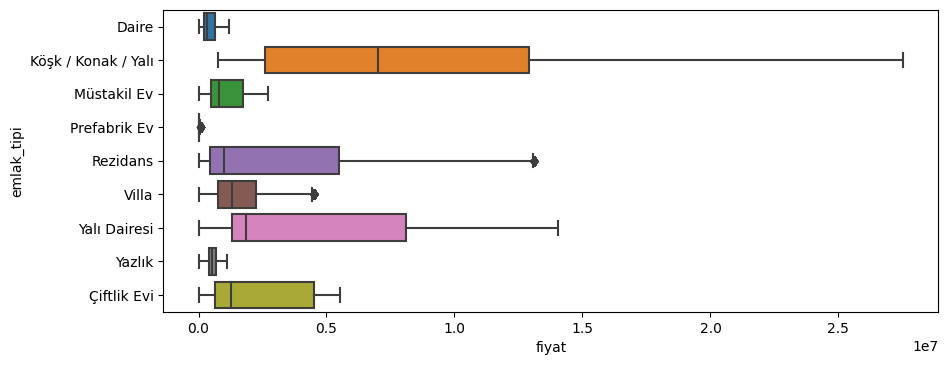

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x="fiyat",y="emlak_tipi", data=df);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64415 entries, 0 to 64572
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   adres                       64415 non-null  object
 1   fiyat                       64415 non-null  int64 
 2   oda_sayısı                  64415 non-null  int64 
 3   brüt_m2                     64415 non-null  object
 4   net_m2                      64415 non-null  object
 5   emlak_tipi                  64415 non-null  string
 6   bina_yaşı                   64415 non-null  string
 7   bulunduğu_kat               64415 non-null  string
 8   kat_sayısı                  64415 non-null  string
 9   ısıtma_tipi                 64415 non-null  string
 10  banyo_sayısı                64415 non-null  string
 11  otopark                     64415 non-null  int64 
 12  interkom                    64415 non-null  int64 
 13  deprem_yönetmeliğine_uygun  64415 non-null  in

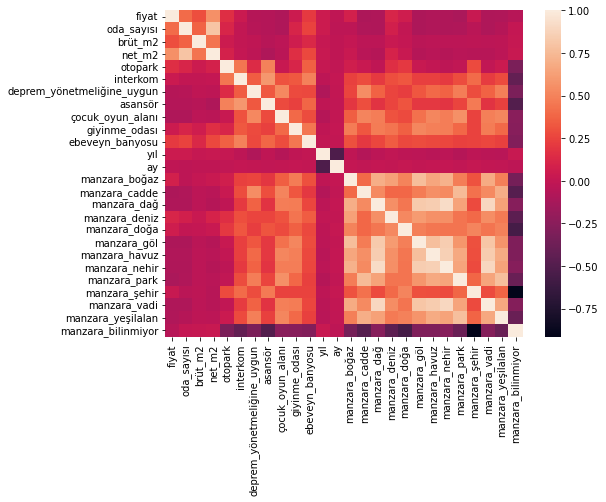

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr());

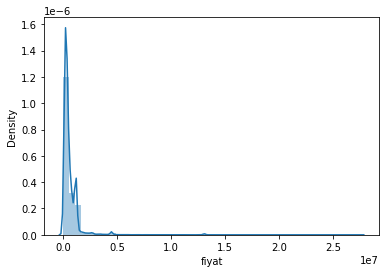

In [ ]:
sns.distplot(df.fiyat)

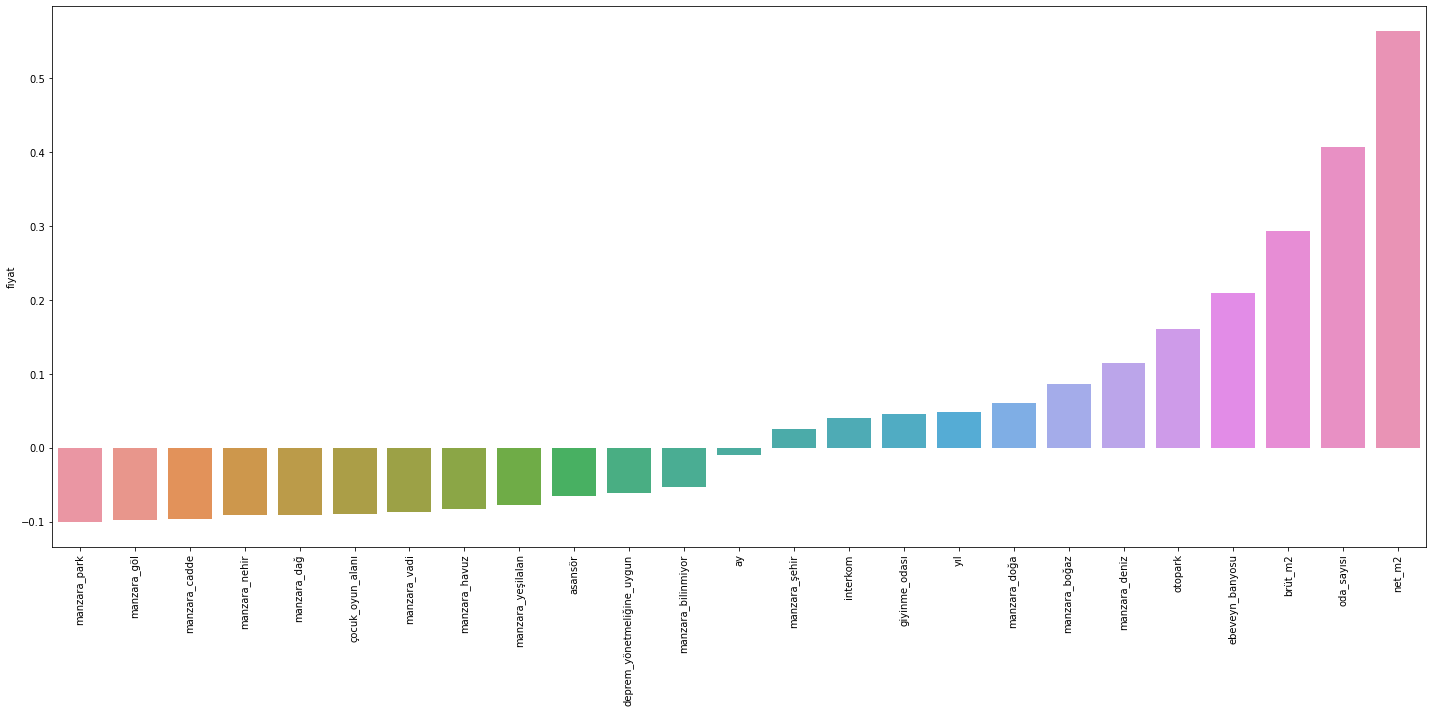

In [ ]:
corr_by_price = df.corr()["fiyat"].sort_values()[:-1]

plt.figure(figsize=(20, 10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
for col in df.select_dtypes(exclude=['number']):
    print(col + ' :')
    print(df[col].value_counts())
    print('-------------------------------')

adres :
İstanbul/Beylikdüzü/Cumhuriyet        5715
İstanbul/Beylikdüzü/Yakuplu           2220
İstanbul/Kadıköy/Suadiye              1879
İstanbul/Beylikdüzü/Adnan Kahveci     1828
İstanbul/Beylikdüzü/Beylikdüzü OSB    1497
                                      ... 
İzmir/Bergama/Bahçelievler              20
İzmir/Bornova/Yakaköy                   20
İzmir/Narlıdere/Sahilevleri             20
İstanbul/Beşiktaş/Kültür                20
İzmir/Çiğli/Uğur Mumcu                  20
Name: adres, Length: 420, dtype: Int64
-------------------------------
emlak_tipi :
Daire                  55185
Villa                   4073
Rezidans                1091
Yazlık                   996
Müstakil Ev              907
Prefabrik Ev             140
Yalı Dairesi              70
Köşk / Konak / Yalı       33
Çiftlik Evi               23
Name: emlak_tipi, dtype: Int64
-------------------------------
bina_yaşı :
0              27599
6-10 arası      5522
16-20 arası     3610
1               3470
21-25 arası    

In [ ]:
df.columns

Index(['adres', 'fiyat', 'oda_sayısı', 'brüt_m2', 'net_m2', 'emlak_tipi',
       'bina_yaşı', 'bulunduğu_kat', 'kat_sayısı', 'ısıtma_tipi',
       'banyo_sayısı', 'otopark', 'interkom', 'deprem_yönetmeliğine_uygun',
       'asansör', 'çocuk_oyun_alanı', 'giyinme_odası', 'ebeveyn_banyosu',
       'yıl', 'ay', 'manzara_boğaz', 'manzara_cadde', 'manzara_dağ',
       'manzara_deniz', 'manzara_doğa', 'manzara_göl', 'manzara_havuz',
       'manzara_nehir', 'manzara_park', 'manzara_şehir', 'manzara_vadi',
       'manzara_yeşilalan', 'manzara_bilinmiyor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62518 entries, 0 to 63784
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       62518 non-null  string 
 1   fiyat                       62518 non-null  float64
 2   oda_sayısı                  62518 non-null  int64  
 3   brüt_m2                     62518 non-null  float64
 4   net_m2                      62518 non-null  float64
 5   emlak_tipi                  62518 non-null  string 
 6   bina_yaşı                   62518 non-null  string 
 7   bulunduğu_kat               62518 non-null  string 
 8   kat_sayısı                  62518 non-null  string 
 9   ısıtma_tipi                 62518 non-null  string 
 10  banyo_sayısı                62518 non-null  string 
 11  otopark                     62518 non-null  int32  
 12  interkom                    62518 non-null  int64  
 13  deprem_yönetmeliğine_uygun  625

In [ ]:
df = pd.get_dummies(data=df, columns=["adres", 
                                 "emlak_tipi", 
                                 "bina_yaşı", 
                                 "bulunduğu_kat", 
                                "kat_sayısı",
                                "ısıtma_tipi",
                                "banyo_sayısı"])

## Data Pre-processing

#### Train-Test Split

In [ ]:
X = df.drop("fiyat", axis=1)
y = df["fiyat"]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_columns = X_train.columns

In [ ]:
X_train_columns

Index(['oda_sayısı', 'brüt_m2', 'net_m2', 'otopark', 'interkom',
       'deprem_yönetmeliğine_uygun', 'asansör', 'çocuk_oyun_alanı',
       'giyinme_odası', 'ebeveyn_banyosu',
       ...
       'ısıtma_tipi_Yerden Isıtma', 'ısıtma_tipi_Yok', 'banyo_sayısı_-',
       'banyo_sayısı_0', 'banyo_sayısı_1', 'banyo_sayısı_2', 'banyo_sayısı_3',
       'banyo_sayısı_4', 'banyo_sayısı_5', 'banyo_sayısı_6 ve üzeri'],
      dtype='object', length=542)

#### Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

#### Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression(n_jobs=-1)
# lm.fit(X_train, y_train)
# y_pred = lm.predict(X_test)
# eval_metrics(y_test, y_pred)

#### Ridge Regression

In [ ]:
# from sklearn.linear_model import Ridge
# ridge_model = Ridge()
# ridge_model.fit(X_train, y_train)
# y_pred = ridge_model.predict(X_test)
# eval_metrics(y_test, y_pred)

#### Lasso Regression

In [ ]:
# from sklearn.linear_model import Lasso, LassoCV
# lasso_model = Lasso()
# lasso_model.fit(X_train, y_train)
# y_pred = lasso_model.predict(X_test)
# eval_metrics(y_test, y_pred)

In [ ]:
# alpha_space = np.linspace(1330, 1340, 100)
# alpha_space

In [ ]:
# lasso_cv_model = LassoCV(alphas=alpha_space,  cv=10,
#                          max_iter=100000, n_jobs=-1).fit(X_train, y_train)

In [ ]:
# lasso_cv_model.alpha_

In [ ]:
# y_pred = lasso_cv_model.predict(X_test)

In [ ]:
# eval_metrics(y_test, y_pred)

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
eval_metrics(y_test, y_pred)

r2_score: 0.8717018223488194 
 mae: 122282.53910781242 
 mse: 118611458669.87468 
 rmse: 344400.1432489172


#### XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)
y_pred= xgb_model.predict(X_test_scaled)
eval_metrics(y_test, y_pred)

[15:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score: 0.8372445011256386 
 mae: 192914.54331988763 
 mse: 150467196662.11502 
 rmse: 387901.0139998541


#### CatBoost

In [ ]:
#!pip3 install catboost
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train_scaled, y_train)
y_pred= cb_model.predict(X_test_scaled)
eval_metrics(y_test, y_pred)

r2_score: 0.9058952159799751 
 mae: 134098.32238719266 
 mse: 86999721311.52054 
 rmse: 294957.1516534572


In [ ]:
import pickle
with open('/content/gdrive/MyDrive/DATA/rfmodel4.pickle', 'wb') as handle:
    pickle.dump(rf_model, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/content/gdrive/MyDrive/DATA/cbmodel4.pickle', 'wb') as handle:
    pickle.dump(cb_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Bütün Data**`

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
# rf2_model = RandomForestRegressor(n_jobs=-1)
# rf2_model.fit(X_scaled, y)
# cb2_model = CatBoostRegressor(verbose=False)
# cb2_model.fit(X_scaled, y)



In [ ]:
y_pred = rf_model.predict(X_scaled)

In [ ]:
my_dict = {"Actual" : y, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
30176,290000,315780.0000000000
56086,250000,255605.0000000000
15498,140000,143725.0000000000
44318,340000,352007.5000000000
38289,1950000,1724600.0000000000
63991,219000,204333.3333333333
58100,2100000,1541000.0000000000
37252,103000,107420.0000000000
55202,1450000,1419050.0000000000
44450,350000,381050.0000000000


In [ ]:
eval_metrics(y, y_pred)

r2_score: 0.9773802768397849 
 mae: 96336.09612239392 
 mse: 226237368721.6406 
 rmse: 475644.1618706579


In [ ]:
compare["Diff"] = compare.Actual - compare.Pred

In [ ]:
compare.Pred.sort_values()

28130        6586.8750000000
28128        6727.5000000000
28140        6896.0000000000
26244        7327.9166666667
26179        7865.4166666667
                ...         
11887    99486000.0000000000
56140   112759000.0000000000
25810   144119500.0000000000
60117   146808500.0000000000
62339   169719000.0000000000
Name: Pred, Length: 64415, dtype: float64

In [ ]:
compare["Diff"][compare.Diff < -5000000].sort_values()

60099   -18345000.0000000000
11785   -17518000.0000000000
63737   -17495000.0000000000
43473   -17258000.0000000000
25899   -14020100.0000000000
8929    -12117500.0000000000
5195    -12065000.0000000000
53179   -10742750.0000000000
42394   -10717500.0000000000
51230   -10660550.0000000000
45636    -9912000.0000000000
5291     -9021000.0000000000
7444     -8293500.0000000000
41530    -8080500.0000000000
60278    -7727450.0000000000
25891    -7515000.0000000000
62380    -7455000.0000000000
62399    -7250000.0000000000
60282    -7231000.0000000000
64497    -7060960.0000000000
43285    -6947500.0000000000
62371    -6701950.0000000000
60625    -6531000.0000000000
14737    -6457900.0000000000
62363    -6455000.0000000000
39171    -6444200.0000000000
41164    -6234500.0000000000
26880    -5716300.0000000000
8886     -5280000.0000000000
8490     -5242000.0000000000
5206     -5215000.0000000000
1673     -5176000.0000000000
Name: Diff, dtype: float64

In [ ]:
df.iloc[51097]

In [ ]:
# df_test = pd.read_csv("Hazır_test_verisi.csv")

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test = pd.get_dummies(df_test).reindex(columns=X_train_columns, fill_value=0)

In [ ]:
df_test = scaler.transform(df_test)

In [ ]:
final_pred = rf_model.predict(df_test)

In [ ]:
final_pred.shape

In [ ]:
submission = pd.read_csv("sample_submission_zingat.csv")

In [ ]:
submission.head()

In [ ]:
submission["Expected"] = final_pred

In [ ]:
submission.head()

In [ ]:
submission.to_csv("Submission_V1.csv", index=False)

### Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape

(51524, 147)

In [ ]:
model = Sequential()

model.add(Dense(147, activation = 'relu'))
model.add(Dense(147, activation = 'relu'))
model.add(Dense(147, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=700)

Epoch 1/700
403/403 [==============================] - 1s 1ms/step - loss: 2728935030784.0000 - val_loss: 1972254277632.0000
Epoch 2/700
403/403 [==============================] - 1s 2ms/step - loss: 2701968015360.0000 - val_loss: 1967219408896.0000
Epoch 3/700
403/403 [==============================] - 1s 1ms/step - loss: 2689108279296.0000 - val_loss: 1958917439488.0000
Epoch 4/700
403/403 [==============================] - 1s 1ms/step - loss: 2732740050944.0000 - val_loss: 1971005161472.0000
Epoch 5/700
403/403 [==============================] - 1s 2ms/step - loss: 2676526153728.0000 - val_loss: 1977255329792.0000
Epoch 6/700
403/403 [==============================] - 1s 1ms/step - loss: 2659079684096.0000 - val_loss: 1963391451136.0000
Epoch 7/700
403/403 [==============================] - 1s 2ms/step - loss: 2658960670720.0000 - val_loss: 1970730958848.0000
Epoch 8/700
403/403 [==============================] - 1s 2ms/step - loss: 2623312494592.0000 - val_loss: 1977121505280.0000


403/403 [==============================] - 1s 2ms/step - loss: 1899928223744.0000 - val_loss: 2125020659712.0000
Epoch 67/700
403/403 [==============================] - 1s 2ms/step - loss: 1900888981504.0000 - val_loss: 2106673725440.0000
Epoch 68/700
403/403 [==============================] - 1s 2ms/step - loss: 1890526167040.0000 - val_loss: 2126705328128.0000
Epoch 69/700
403/403 [==============================] - 1s 2ms/step - loss: 1836485836800.0000 - val_loss: 2129627709440.0000
Epoch 70/700
403/403 [==============================] - 1s 2ms/step - loss: 1834420011008.0000 - val_loss: 2169003966464.0000
Epoch 71/700
403/403 [==============================] - 1s 2ms/step - loss: 1796122083328.0000 - val_loss: 2184837332992.0000
Epoch 72/700
403/403 [==============================] - 1s 1ms/step - loss: 1842511609856.0000 - val_loss: 2172994322432.0000
Epoch 73/700
403/403 [==============================] - 1s 2ms/step - loss: 1813735407616.0000 - val_loss: 2135103242240.0000
Epoch

Epoch 131/700
403/403 [==============================] - 1s 2ms/step - loss: 1300421935104.0000 - val_loss: 2362086785024.0000
Epoch 132/700
403/403 [==============================] - 1s 2ms/step - loss: 1266626592768.0000 - val_loss: 2216352022528.0000
Epoch 133/700
403/403 [==============================] - 1s 1ms/step - loss: 1286896353280.0000 - val_loss: 2238900862976.0000
Epoch 134/700
403/403 [==============================] - 1s 2ms/step - loss: 1286616645632.0000 - val_loss: 2228878573568.0000
Epoch 135/700
403/403 [==============================] - 1s 2ms/step - loss: 1283997040640.0000 - val_loss: 2205432676352.0000
Epoch 136/700
403/403 [==============================] - 1s 2ms/step - loss: 1301060780032.0000 - val_loss: 2215792869376.0000
Epoch 137/700
403/403 [==============================] - 1s 2ms/step - loss: 1222908706816.0000 - val_loss: 2215021903872.0000
Epoch 138/700
403/403 [==============================] - 1s 1ms/step - loss: 1254106857472.0000 - val_loss: 230

403/403 [==============================] - 1s 1ms/step - loss: 673989001216.0000 - val_loss: 2064855990272.0000
Epoch 261/700
403/403 [==============================] - 1s 1ms/step - loss: 652886474752.0000 - val_loss: 2050706112512.0000
Epoch 262/700
403/403 [==============================] - 1s 1ms/step - loss: 631630528512.0000 - val_loss: 2136884903936.0000
Epoch 263/700
403/403 [==============================] - 1s 1ms/step - loss: 643528523776.0000 - val_loss: 2088167538688.0000
Epoch 264/700
403/403 [==============================] - 1s 1ms/step - loss: 742756450304.0000 - val_loss: 2139074985984.0000
Epoch 265/700
403/403 [==============================] - 1s 2ms/step - loss: 631833886720.0000 - val_loss: 2041621250048.0000
Epoch 266/700
403/403 [==============================] - 1s 2ms/step - loss: 634803388416.0000 - val_loss: 2045957373952.0000
Epoch 267/700
403/403 [==============================] - 1s 2ms/step - loss: 620540395520.0000 - val_loss: 2036608270336.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 333777043456.0000 - val_loss: 1996876808192.0000
Epoch 391/700
403/403 [==============================] - 1s 2ms/step - loss: 313416548352.0000 - val_loss: 2068556414976.0000
Epoch 392/700
403/403 [==============================] - 1s 1ms/step - loss: 306886574080.0000 - val_loss: 2246212583424.0000
Epoch 393/700
403/403 [==============================] - 1s 2ms/step - loss: 317185359872.0000 - val_loss: 2013990748160.0000
Epoch 394/700
403/403 [==============================] - 1s 2ms/step - loss: 321839071232.0000 - val_loss: 1969059266560.0000
Epoch 395/700
403/403 [==============================] - 1s 1ms/step - loss: 344235081728.0000 - val_loss: 2042600751104.0000
Epoch 396/700
403/403 [==============================] - 1s 1ms/step - loss: 328854241280.0000 - val_loss: 2048825098240.0000
Epoch 397/700
403/403 [==============================] - 1s 1ms/step - loss: 314840481792.0000 - val_loss: 2004409516032.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 206432206848.0000 - val_loss: 2216351498240.0000
Epoch 521/700
403/403 [==============================] - 1s 1ms/step - loss: 179425869824.0000 - val_loss: 2321376870400.0000
Epoch 522/700
403/403 [==============================] - 1s 2ms/step - loss: 169218097152.0000 - val_loss: 2179468361728.0000
Epoch 523/700
403/403 [==============================] - 1s 1ms/step - loss: 187286077440.0000 - val_loss: 2310990725120.0000
Epoch 524/700
403/403 [==============================] - 1s 2ms/step - loss: 194380759040.0000 - val_loss: 2279818395648.0000
Epoch 525/700
403/403 [==============================] - 1s 2ms/step - loss: 195365994496.0000 - val_loss: 2341801558016.0000
Epoch 526/700
403/403 [==============================] - 1s 2ms/step - loss: 203436589056.0000 - val_loss: 2297895583744.0000
Epoch 527/700
403/403 [==============================] - 1s 1ms/step - loss: 204131500032.0000 - val_loss: 2283845713920.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 177234608128.0000 - val_loss: 2312459255808.0000
Epoch 651/700
403/403 [==============================] - 1s 1ms/step - loss: 193050591232.0000 - val_loss: 2423443161088.0000
Epoch 652/700
403/403 [==============================] - 1s 1ms/step - loss: 169263661056.0000 - val_loss: 2277191188480.0000
Epoch 653/700
403/403 [==============================] - 1s 1ms/step - loss: 141415284736.0000 - val_loss: 2172649603072.0000
Epoch 654/700
403/403 [==============================] - 1s 1ms/step - loss: 145253941248.0000 - val_loss: 2305867382784.0000
Epoch 655/700
403/403 [==============================] - 1s 2ms/step - loss: 152044224512.0000 - val_loss: 2255572959232.0000
Epoch 656/700
403/403 [==============================] - 1s 2ms/step - loss: 182842884096.0000 - val_loss: 2278103187456.0000
Epoch 657/700
403/403 [==============================] - 1s 2ms/step - loss: 160176209920.0000 - val_loss: 2587741126656.0000
Epoch 

#### Model Performance

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test,y_pred)

r2_score: 0.7115348148980936 
 mae: 324110.6433248947 
 mse: 2364225923885.405 
 rmse: 1537603.9554727364


In [ ]:
model.evaluate(X_test, y_test, verbose=0)

2364226666496.0

In [ ]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
12758,380000,3.397514e+05
38610,700000,7.209528e+05
31502,197000,3.426473e+05
52576,380000,5.318059e+05
30762,259000,2.794569e+05
29034,770000,4.504471e+05
58186,1750000,1.838531e+06
29423,170000,1.955809e+05
12283,184000,1.955809e+05
15992,1980000,1.473174e+06


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

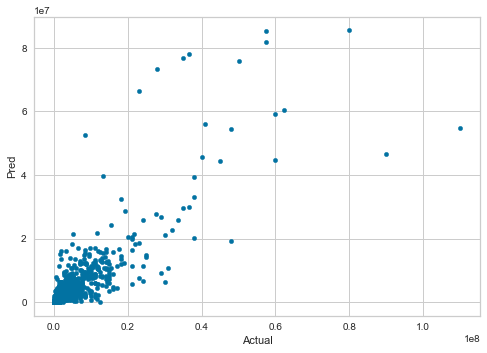

In [ ]:
compare.plot(x="Actual", y="Pred", kind="scatter")

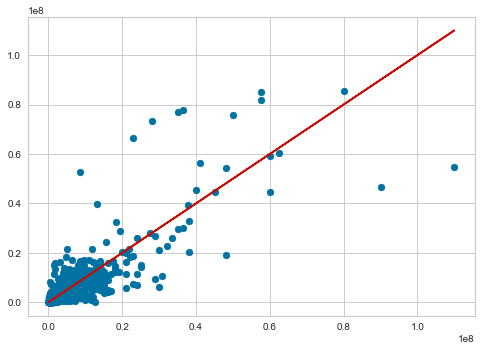

In [ ]:
# Our predictions
plt.scatter(y_test, y_pred)

# Perfect predictions
plt.plot(y_test, y_test, 'r');

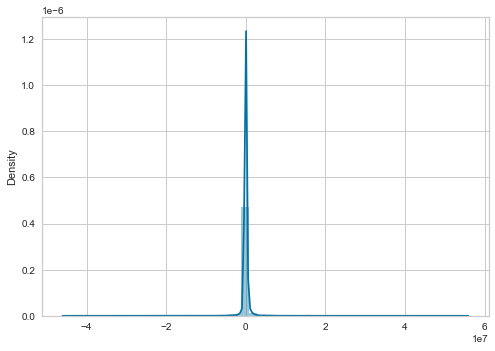

In [ ]:
errors = y_test.values.reshape(-1, 1) - y_pred
sns.distplot(errors);

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    eval_metrics(y_test, preds)
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,8),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
svr = SVR()
param_grid = {"C": [0.01,0.1,1,5,10,100,1000], "gamma":["auto","scale"]}

grid = GridSearchCV(svr,param_grid)
run_model(grid, X_train, y_train, X_test, y_test)